In [4]:
# This is the first and most basic TEMPLATE for Binary Classification and Regression Models


# Binary Classification Template

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score
from time import time
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, PassiveAggressiveClassifier, Perceptron
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB, MultinomialNB
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [6]:
# Load and View the first 5 rows of your data
df = pd.read_csv('https://raw.githubusercontent.com/fenago/datasets/main/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
# Fills any "holes" in the data so there are no empty values.  Notice that it replaces all empty values with a 0 which may not be the best
df.fillna(0, inplace=True)

print(df.nunique())

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64


In [8]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [10]:
# You must convert all features into numeric values.  Do the target first... then the features.
# We'll start with the target... Obviously if you reuse this template - you must change the variable from "class" to your target
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
le = LabelEncoder()

# Fit and transform the binary column
df['class'] = le.fit_transform(df['class'])

# Print the mapping
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

{'e': 0, 'p': 1}


In [11]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [12]:
# Now we must "encode" the features in the dataset... turn them all numeric
# remember, in the template, you must replace "class"
X = df.drop(['class'], axis=1)
y = df['class']
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [13]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [ ]:
# Notes and Tips:
# df = df.rename(columns={'old_name': 'new_name'})
# df = df.drop(['column_to_delete'], axis=1)
# df['column_name'] = df['column_name'].astype(float)
# and of course... there is good ol' google and chatgpt
# df = pd.get_dummies(df, columns=['categorical_column'])

In [14]:
X = pd.get_dummies(X)
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [15]:
# Split the data into a train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)


In [16]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('SGD', SGDClassifier()))
models.append(('Ridge', RidgeClassifier()))
models.append(('PAC', PassiveAggressiveClassifier()))
models.append(('Perceptron', Perceptron()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NearestCentroid', NearestCentroid()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('ExtraTree', ExtraTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('BNB', BernoulliNB()))
models.append(('ComplementNB', ComplementNB()))
models.append(('MultinomialNB', MultinomialNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('NuSVC', NuSVC()))
models.append(('LinearSVC', LinearSVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('ExtraTrees', ExtraTreesClassifier()))
models.append(('Bagging', BaggingClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('MLP', MLPClassifier()))
models.append(('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')))

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


LR: 1.000000 (0.000000)
Score for each of the 10 K-fold tests:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
LogisticRegression(solver='liblinear')
	Training time: 0.068s
	Prediction time: 0.831s

SGD: 0.999846 (0.000462)
Score for each of the 10 K-fold tests:  [1.         1.         1.         1.         1.         1.
 0.99846154 1.         1.         1.        ]
SGDClassifier()
	Training time: 0.072s
	Prediction time: 0.621s

Ridge: 0.999538 (0.000705)
Score for each of the 10 K-fold tests:  [1.         1.         1.         0.99846154 1.         1.
 1.         0.99846154 0.99846154 1.        ]
RidgeClassifier()
	Training time: 0.081s
	Prediction time: 1.184s

PAC: 1.000000 (0.000000)
Score for each of the 10 K-fold tests:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
PassiveAggressiveClassifier()
	Training time: 0.118s
	Prediction time: 1.358s

Perceptron: 1.000000 (0.000000)
Score for each of the 10 K-fold tests:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Perceptron()
	Training time: 0.116s
	Prediction time: 1.309s



/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/disc

QDA: 1.000000 (0.000000)
Score for each of the 10 K-fold tests:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
QuadraticDiscriminantAnalysis()
	Training time: 0.244s
	Prediction time: 2.408s

KNN: 1.000000 (0.000000)
Score for each of the 10 K-fold tests:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
KNeighborsClassifier()
	Training time: 0.007s
	Prediction time: 1.929s

NearestCentroid: 0.888136 (0.006934)
Score for each of the 10 K-fold tests:  [0.88923077 0.88769231 0.89230769 0.89692308 0.89846154 0.88923077
 0.87384615 0.88923077 0.88307692 0.88135593]
NearestCentroid()
	Training time: 0.007s
	Prediction time: 0.163s

CART: 1.000000 (0.000000)
Score for each of the 10 K-fold tests:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
DecisionTreeClassifier()
	Training time: 0.028s
	Prediction time: 0.376s

ExtraTree: 0.999538 (0.000985)
Score for each of the 10 K-fold tests:  [1.         1.         1.         1.         1.         0.99692308
 1.         1.         0.99846154 1.        ]
ExtraTreeClassifier()
	Training time: 0.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

XGBoost: 1.000000 (0.000000)
Score for each of the 10 K-fold tests:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)
	Training time: 3.610s
	Prediction time: 21.753s



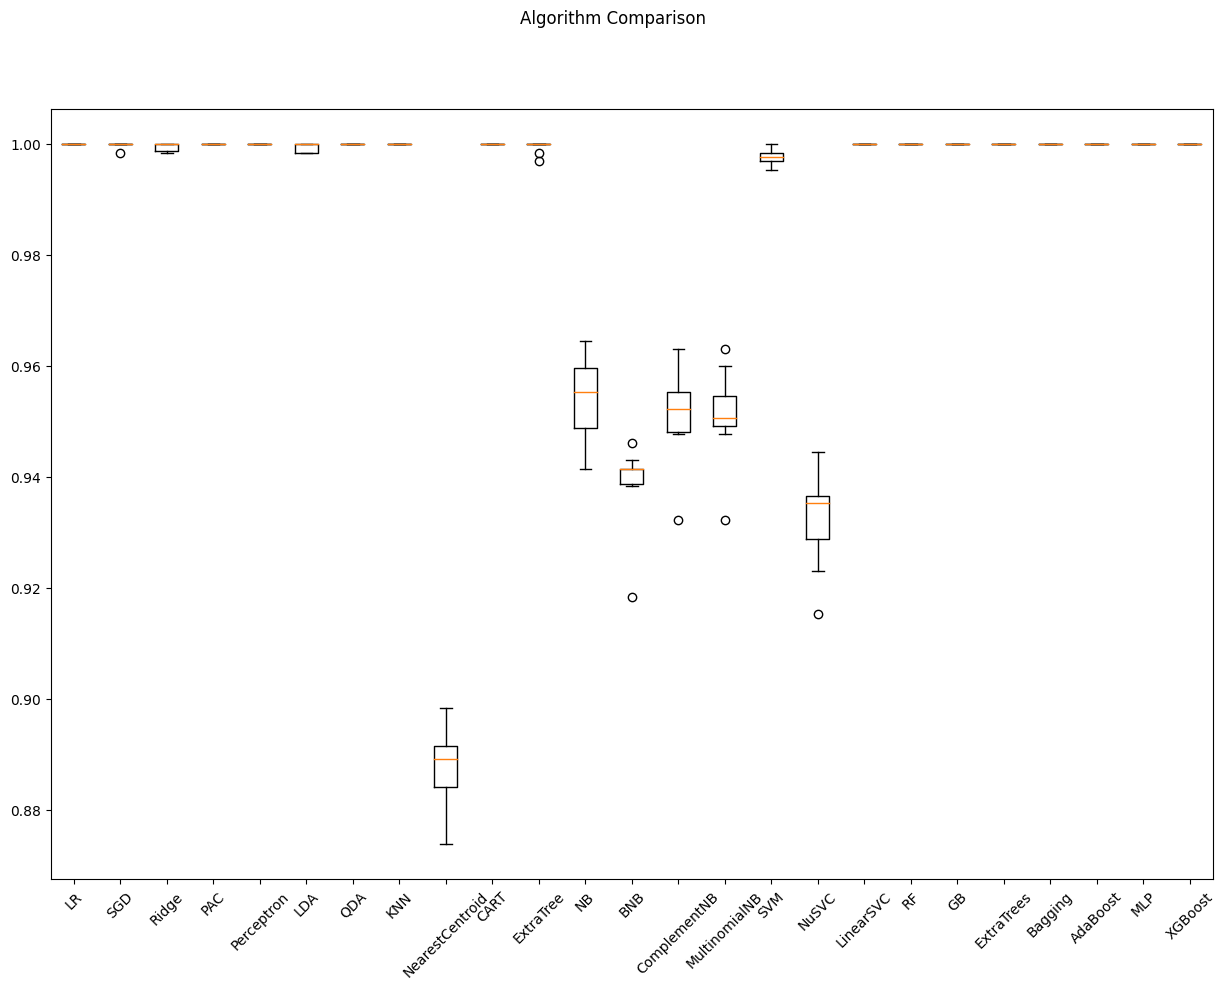

In [17]:
# Algorithm Harness
# Scoring metrics:
# 'accuracy', 'balanced_accuracy', 'average_precision', 'neg_brier_score', 'f1', 'f1_micro', 'f1_macro', 'f1_weighted',
# 'neg_log_loss', 'precision', 'recall', 'jaccard', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted'
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    start = time()
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    model.fit(X_train, y_train)
    train_time = time() - start
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    predict_time = time() - start
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print("Score for each of the 10 K-fold tests: ",cv_results)
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print()

fig = pyplot.figure(figsize=(15, 10))  # Change the numbers as needed
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names, rotation = 45)  # Added rotation for better visibility
pyplot.show()

In [18]:
# Example Data:  https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset?resource=download